In [7]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("../data/salary_analysis.db")
df = pd.read_sql_query("SELECT * FROM salary_data;", conn)
conn.close()


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop("salary_in_usd", axis=1)
y = df["salary_in_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
df.select_dtypes(include='object').columns


Index(['Country', 'experience_level', 'employment_type', 'job_title',
       'company_size', 'role_category'],
      dtype='object')

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [12]:
X = df_encoded.drop("salary_in_usd", axis=1)
y = df_encoded["salary_in_usd"]


In [14]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Country', 'experience_level', 'employment_type', 'job_title', 'company_size','role_category']

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [15]:
X = df.drop("salary_in_usd", axis=1)
y = df["salary_in_usd"]


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"{name} | R2: {r2_score(y_test, preds):.3f} | MAE: {mean_absolute_error(y_test, preds):.2f} | RMSE: {rmse:.2f}")


Linear Regression | R2: 1.000 | MAE: 16.42 | RMSE: 24.35


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
}

from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"{name} | R2: {r2_score(y_test, preds):.3f} | MAE: {mean_absolute_error(y_test, preds):.2f} | RMSE: {rmse:.2f}")


Linear Regression | R2: 1.000 | MAE: 16.42 | RMSE: 24.35


In [21]:
print(y_train.describe())
print(y_test.describe())


count       485.000000
mean     114155.193814
std       72943.874734
min        4000.000000
25%       63711.000000
50%      100800.000000
75%      152500.000000
max      600000.000000
Name: salary_in_usd, dtype: float64
count       122.000000
mean     104914.245902
std       62163.038069
min        2859.000000
25%       61656.500000
50%      103770.500000
75%      138450.000000
max      412000.000000
Name: salary_in_usd, dtype: float64


In [22]:
y = df['salary_in_usd']  # target variable


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['salary_in_usd', 'log_salary'])  # keep features only
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{name} | R2: {r2_score(y_test, preds):.3f} | MAE: {mean_absolute_error(y_test, preds):.2f} | RMSE: {rmse:.2f}")


Linear Regression | R2: 1.000 | MAE: 16.51 | RMSE: 24.56
Random Forest | R2: 1.000 | MAE: 404.49 | RMSE: 947.24
XGBoost | R2: 0.999 | MAE: 669.02 | RMSE: 1737.13


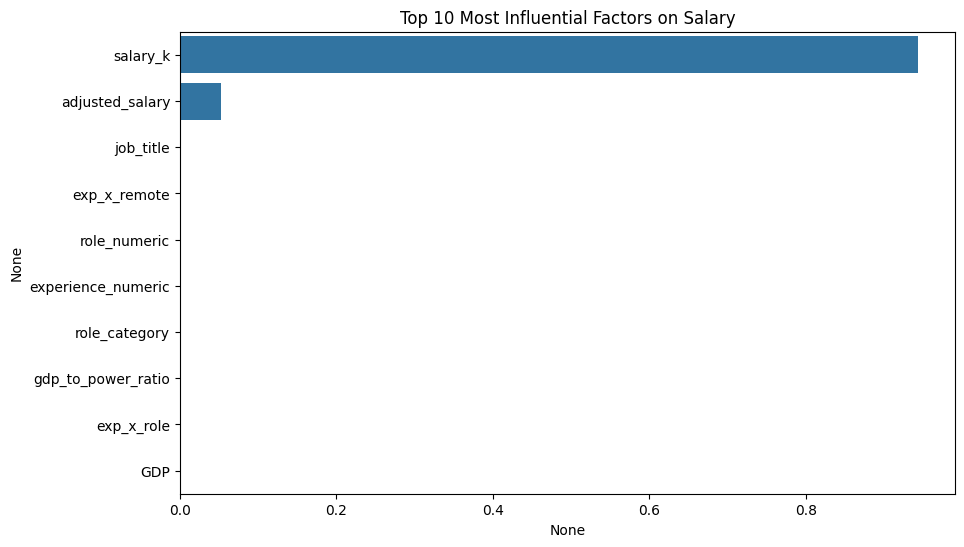

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

rf_model = models["Random Forest"]
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Most Influential Factors on Salary")
plt.show()


In [27]:
import joblib
joblib.dump(rf_model, "../models/salary_predictor.pkl")


['../models/salary_predictor.pkl']

In [31]:
import joblib
import pandas as pd
from dash import Dash, Input, Output
import dash

# Initialize the Dash app
app = Dash(__name__)

# Load the model (make sure the path is correct)
model = joblib.load("../models/salary_predictor.pkl")

# Define the callback
@app.callback(
    Output("predicted-salary", "children"),
    Input("experience-level", "value"),
    Input("country", "value"),
    Input("remote-ratio", "value")
)
def predict_salary(exp, country, remote):
    features = pd.DataFrame([[exp, country, remote]], 
                            columns=["experience_level", "country", "remote_ratio"])
    pred = model.predict(features)[0]
    return f"💰 Estimated Salary: ${pred:,.0f}"

# Run the app (only if this script is run directly)
if __name__ == '__main__':
    app.run_server(debug=True)

ObsoleteAttributeException: app.run_server has been replaced by app.run